#特征工程方法

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#使用feature engine 库来做特征处理
!pip install feature_engine
from feature_engine.encoding import RareLabelEncoder

data = pd.read_csv('train.csv')
print(data.shape)
data.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
#数据信息展开
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#数据校验，确保数据id是唯一的
#nunique()为唯一性方法，用于确认数据是否唯一
data['Id'].nunique() == data.shape[0]

print(data['Id'].nunique())
print(data.shape[0])# shape输出形状，shape[0]输出列数量

print('id列重复值校验',data['Id'].nunique() == data.shape[0])#检查id列是否重复，True为没有

print('数据重复值校验',data.duplicated().sum()) #检查数据是否有重复值,0为没有

print('缺失值校验\n',data.isnull().sum()) #缺失值校验，LotFrontage,Allery等数据存在缺失

1460
1460
id列重复值校验 True
数据重复值校验 0
缺失值校验
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
#OneHot编码
#一般用于处理多分类string数据，转换为onehot数据进行训练。传统机器学习无法使用string训练

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 选择需要编码的分类列
categorical_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(data[categorical_columns])

# 获取新列名
feature_names = encoder.get_feature_names_out(categorical_columns)

# 创建编码后的DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=feature_names, index=data.index)

# 删除原始分类列
data_new = data.drop(columns=categorical_columns)

# 合并编码后的列
data_final = pd.concat([data_new, encoded_df], axis=1)

print(f"原始形状: {data.shape}")
print(f"编码后形状: {data_final.shape}")

原始形状: (1460, 81)
编码后形状: (1460, 88)


#连续型变量分箱和具体分箱方法

In [ ]:
#连续数据离散化，直接替换对应数据字段或者添加新数据字段
#优点可以处理一些异常值，比如收出转为低中高三个档，收入过高的同样也是高档。
#离散化后可以为一些线性模型提供非线性因素提高模型表现
#适用于逻辑回归


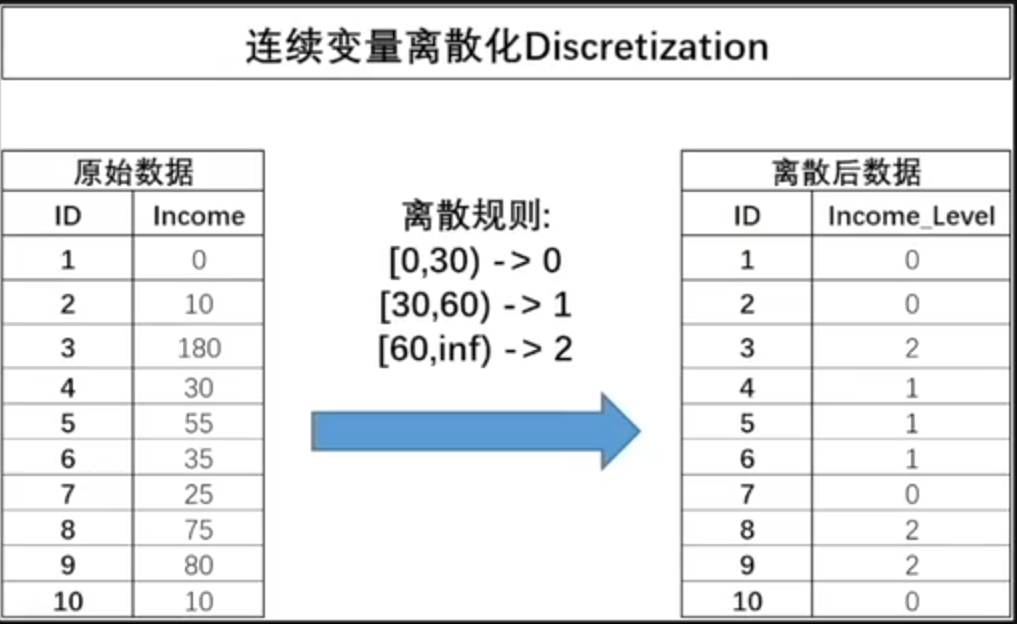

In [ ]:
#等宽分箱，每个箱子的宽度相等，而不是每个箱子的样本数量相等。容易受到异常值影响。
from sklearn.preprocessing import KBinsDiscretizer #sklearn 的连续变量分箱离散化处理库
import numpy as np

income = np.array([0, 10, 180, 30, 55, 35, 25, 75, 80, 10]).reshape(-1, 1)
dis = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform') #实例化方法对象，参数为分箱数量，编码方式和分箱策略。uniform为等宽分箱

print(income)
print('\n')
print(dis.fit_transform(income))
dis.bin_edges_

[[  0]
 [ 10]
 [180]
 [ 30]
 [ 55]
 [ 35]
 [ 25]
 [ 75]
 [ 80]
 [ 10]]


[[0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]]


array([array([  0.,  60., 120., 180.])], dtype=object)

In [ ]:
#等频分箱,完全忽略异常值信息。
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
print((income.flatten()))
dis = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')
print(dis.fit_transform(income))

dis.bin_edges_ #箱体

[  0  10 180  30  55  35  25  75  80  10]
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]


array([array([  0. ,  32.5, 180. ])], dtype=object)

In [ ]:
#聚类分箱，等宽和等频的结合
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
print((income.flatten()))
dis = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
print(dis.fit_transform(income))

dis.bin_edges_ #箱体


[  0  10 180  30  55  35  25  75  80  10]
[[0.]
 [0.]
 [2.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]]


array([array([  0.        ,  44.16666667, 125.        , 180.        ])],
      dtype=object)

#分组统计

In [ ]:
import pandas as pd
# 用于分组的数据集
data = {
    'tenure': [1, 34, 2, 45, 2, 12, 5, 67, 3, 23, 1, 48, 6, 15, 4, 56, 2, 38, 7, 29],
    'SeniorCitizen': [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0],
    'MonthlyCharges': [29.85, 56.95, 53.85, 42.30, 70.70, 89.10, 45.20, 95.50, 35.60, 78.40,
                       25.30, 104.25, 67.80, 52.15, 88.90, 73.25, 39.75, 96.30, 61.45, 84.20]
}
df = pd.DataFrame(data)
df.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,1,42.30
4,2,0,70.70


In [ ]:
#以均值，最大值，最小值作为统计量汇总
df.groupby('tenure').mean()

#按tenure字段分组，然后对每组计算SeniorCitizen和MonthlyCharges的统计量
df.groupby('tenure').agg({

    'SeniorCitizen': ['mean', 'min', 'max'],

    'MonthlyCharges': ['mean', 'min', 'max']

})

SeniorCitizen         MonthlyCharges                
                mean min max           mean     min     max
tenure                                                     
1                0.0   0   0      27.575000   25.30   29.85
2                0.0   0   0      54.766667   39.75   70.70
3                0.0   0   0      35.600000   35.60   35.60
4                0.0   0   0      88.900000   88.90   88.90
5                0.0   0   0      45.200000   45.20   45.20
6                1.0   1   1      67.800000   67.80   67.80
7                1.0   1   1      61.450000   61.45   61.45
12               0.0   0   0      89.100000   89.10   89.10
15               0.0   0   0      52.150000   52.15   52.15
23               0.0   0   0      78.400000   78.40   78.40
29               0.0   0   0      84.200000   84.20   84.20
34               0.0   0   0      56.950000   56.95   56.95
38               0.0   0   0      96.300000   96.30   96.30
45               1.0   1   1      42.300000   42.30   42.30
48               1.0   1   1     104.250000  104.25  104.25
56               1.0   1   1      73.250000   73.25   73.25
67               1.0   1   1      95.500000   95.50   95.50

In [ ]:
#常用统计量
#1均值方差，2最大最小值，3数据分布偏度

数据分布分析（分组统计）

In [ ]:
d1 = pd.DataFrame({'x1': [3, 2, 4, 4, 2, 2], 'x2': [0, 1, 1, 0, 0, 0]})
d1


,x1,x2
0,3,0
1,2,1
2,4,1
3,4,0
4,2,0
5,2,0


In [ ]:
#分组统计x2
#使用分位数对x2的0和1做数据分析，x2为0时有大于2的有25%，大于3.5有75%
aggs = {'x1': [lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]}
d2 = d1.groupby('x2').agg(aggs).reset_index()
d2

x2         x1           
     <lambda_0> <lambda_1>
0  0        2.0       3.25
1  1        2.5       3.50

#时序特征处理
可以基于基本详细信息和自然周期，时间差值衍生

In [ ]:
# 数据
t = pd.DataFrame()
t['time'] = ['2022-01-03;02:31:52',
             '2022-07-01;14:22:01',
             '2022-08-22;08:02:31',
             '2022-04-30;11:41:31',
             '2022-05-02;22:01:27']
t

,time
0,2022-01-03;02:31:52
1,2022-07-01;14:22:01
2,2022-08-22;08:02:31
3,2022-04-30;11:41:31
4,2022-05-02;22:01:27


In [ ]:
#基本信息衍生
t['datetime'] = pd.to_datetime(t['time'])
t['year'] = t['datetime'].dt.year
t['month'] = t['datetime'].dt.month
t['day'] = t['datetime'].dt.day
t['quarter'] = t['datetime'].dt.quarter
t

,time,datetime,year,month,day,quarter
0,2022-01-03;02:31:52,2022-01-03 02:31:52,2022,1,3,1
1,2022-07-01;14:22:01,2022-07-01 14:22:01,2022,7,1,3
2,2022-08-22;08:02:31,2022-08-22 08:02:31,2022,8,22,3
3,2022-04-30;11:41:31,2022-04-30 11:41:31,2022,4,30,2
4,2022-05-02;22:01:27,2022-05-02 22:01:27,2022,5,2,2


In [ ]:
#时间差值衍生
# 转换为时间格式
t['datetime'] = pd.to_datetime(t['time'], format='%Y-%m-%d;%H:%M:%S')
# 按时间排序
t = t.sort_values('datetime').reset_index(drop=True)
# 计算与前一个时间点的差值（天数）
t['time_diff_days'] = t['datetime'].diff().dt.days

t

,time,datetime,year,month,day,quarter,time_diff_days
0,2022-01-03;02:31:52,2022-01-03 02:31:52,2022,1,3,1,NaN
1,2022-04-30;11:41:31,2022-04-30 11:41:31,2022,4,30,2,117.0
2,2022-05-02;22:01:27,2022-05-02 22:01:27,2022,5,2,2,2.0
3,2022-07-01;14:22:01,2022-07-01 14:22:01,2022,7,1,3,59.0
4,2022-08-22;08:02:31,2022-08-22 08:02:31,2022,8,22,3,51.0


#方差分析
#用于寻找重要特征（线性）

=== Sklearn方差分析示例 ===
数据形状: (150, 4)
特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
类别: ['setosa' 'versicolor' 'virginica']

各特征的方差分析结果:
sepal length (cm): F值=119.26, P值=0.000000
sepal width (cm): F值=49.16, P值=0.000000
petal length (cm): F值=1180.16, P值=0.000000
petal width (cm): F值=960.01, P值=0.000000

选择的前2个重要特征:
特征索引: [2 3]
特征名称: ['petal length (cm)', 'petal width (cm)']
降维后数据形状: (150, 2)


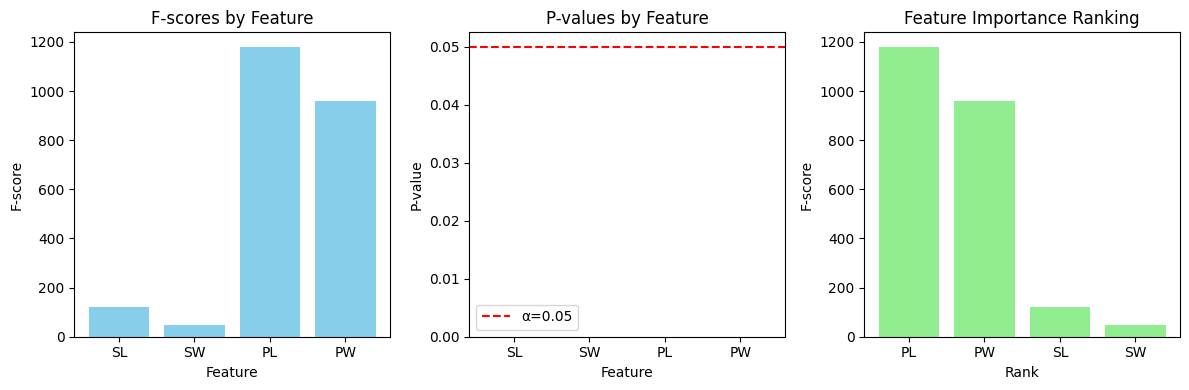


=== 结果总结 ===
F值越大，特征越重要
P值<0.05表示特征显著
最重要的特征: petal length (cm) (F值=1180.16)


In [ ]:
import numpy as np
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
iris = load_iris()
X, y = iris.data, iris.target

print("=== Sklearn方差分析示例 ===")
print(f"数据形状: {X.shape}")
print(f"特征名称: {iris.feature_names}")
print(f"类别: {iris.target_names}")

# 1. 计算每个特征的F值和P值
f_scores, p_values = f_classif(X, y)

print("\n各特征的方差分析结果:")
for i, name in enumerate(iris.feature_names):
    print(f"{name}: F值={f_scores[i]:.2f}, P值={p_values[i]:.6f}")

# 2. 选择最重要的2个特征
selector = SelectKBest(f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# 获取被选中的特征
selected_indices = selector.get_support(indices=True)
selected_features = [iris.feature_names[i] for i in selected_indices]

print(f"\n选择的前2个重要特征:")
print(f"特征索引: {selected_indices}")
print(f"特征名称: {selected_features}")
print(f"降维后数据形状: {X_selected.shape}")

# 3. 可视化
plt.figure(figsize=(12, 4))

# F值柱状图
plt.subplot(1, 3, 1)
plt.bar(range(len(f_scores)), f_scores, color='skyblue')
plt.title('F-scores by Feature')
plt.xlabel('Feature')
plt.ylabel('F-score')
plt.xticks(range(4), ['SL', 'SW', 'PL', 'PW'])

# P值柱状图
plt.subplot(1, 3, 2)
plt.bar(range(len(p_values)), p_values, color='lightcoral')
plt.axhline(y=0.05, color='red', linestyle='--', label='α=0.05')
plt.title('P-values by Feature')
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.xticks(range(4), ['SL', 'SW', 'PL', 'PW'])
plt.legend()

# 特征重要性排序
plt.subplot(1, 3, 3)
sorted_idx = np.argsort(f_scores)[::-1]  # 从大到小排序
plt.bar(range(4), f_scores[sorted_idx], color='lightgreen')
plt.title('Feature Importance Ranking')
plt.xlabel('Rank')
plt.ylabel('F-score')
feature_names_short = ['SL', 'SW', 'PL', 'PW']
plt.xticks(range(4), [feature_names_short[i] for i in sorted_idx])

plt.tight_layout()
plt.show()

# 总结
print("\n=== 结果总结 ===")
print("F值越大，特征越重要")
print("P值<0.05表示特征显著")
most_important = np.argmax(f_scores)
print(f"最重要的特征: {iris.feature_names[most_important]} (F值={f_scores[most_important]:.2f})")

#RFE(特征递归消除法)
#用于删除不重要特征

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 加载数据
iris = load_iris()
X, y = iris.data, iris.target

print("=== 简单RFE例子 ===")
print(f"原始特征数: {X.shape[1]}")
print(f"特征名称: {iris.feature_names}")

# 创建RFE，从4个特征中选择2个最重要的
estimator = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=estimator, n_features_to_select=2)

# 训练RFE
rfe.fit(X, y)

# 查看结果
print(f"\n特征是否被选中: {rfe.support_}")
print(f"特征排名: {rfe.ranking_}")  # 1表示被选中，数字越大越不重要

# 显示被选中的特征
selected_features = [iris.feature_names[i] for i in range(len(iris.feature_names)) if rfe.support_[i]]
print(f"被选中的特征: {selected_features}")

# 转换数据
X_selected = rfe.transform(X)
print(f"转换后数据形状: {X_selected.shape}")

print("\n=== 工作原理 ===")
print("1. 用所有4个特征训练模型")
print("2. 计算特征重要性")
print("3. 删除最不重要的1个特征")
print("4. 用剩下3个特征重新训练")
print("5. 再删除最不重要的1个特征")
print("6. 最终剩下2个最重要的特征")

=== 简单RFE例子 ===
原始特征数: 4
特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

特征是否被选中: [False False  True  True]
特征排名: [3 2 1 1]
被选中的特征: ['petal length (cm)', 'petal width (cm)']
转换后数据形状: (150, 2)

=== 工作原理 ===
1. 用所有4个特征训练模型
2. 计算特征重要性
3. 删除最不重要的1个特征
4. 用剩下3个特征重新训练
5. 再删除最不重要的1个特征
6. 最终剩下2个最重要的特征


#缺失值处理

In [4]:
import numpy as np
import pandas as pd
import random
n = 12

data = {
    'x': np.random.randn(n),
    'y': np.random.randn(n) * 2 + 1
}

# 随机插入一些NaN值
nan_indices = np.random.choice(n, size=8, replace=False)
data['x'][nan_indices[:4]] = np.nan
data['y'][nan_indices[4:]] = np.nan

df = pd.DataFrame(data)

In [8]:
df.isnull().sum()

,0
x,4
y,4


In [ ]:
#缺失值比较少且对结果影响不大，采取零值均值特殊位填补
#填补前后可视化对比

In [ ]:
#影响大的数值采用分层均值填补
#先用kmeans对行或者列聚类，然后选取对应簇均值填补


In [ ]:
#序贯热平台填补
#找到相似行，来填补缺失，如果找不出非常相似的就先找到比较相似的排序依次填补

In [ ]:
#进阶方法
#拟合插补

In [ ]:
#重要
#缺失值替补选择依据


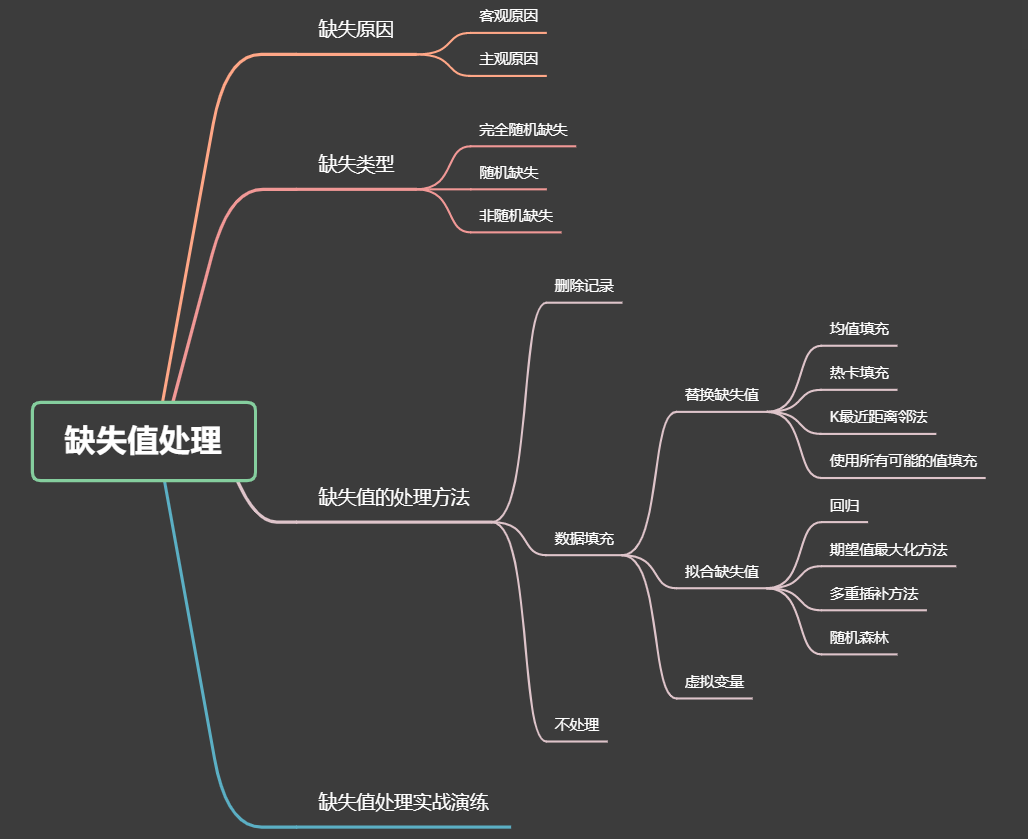

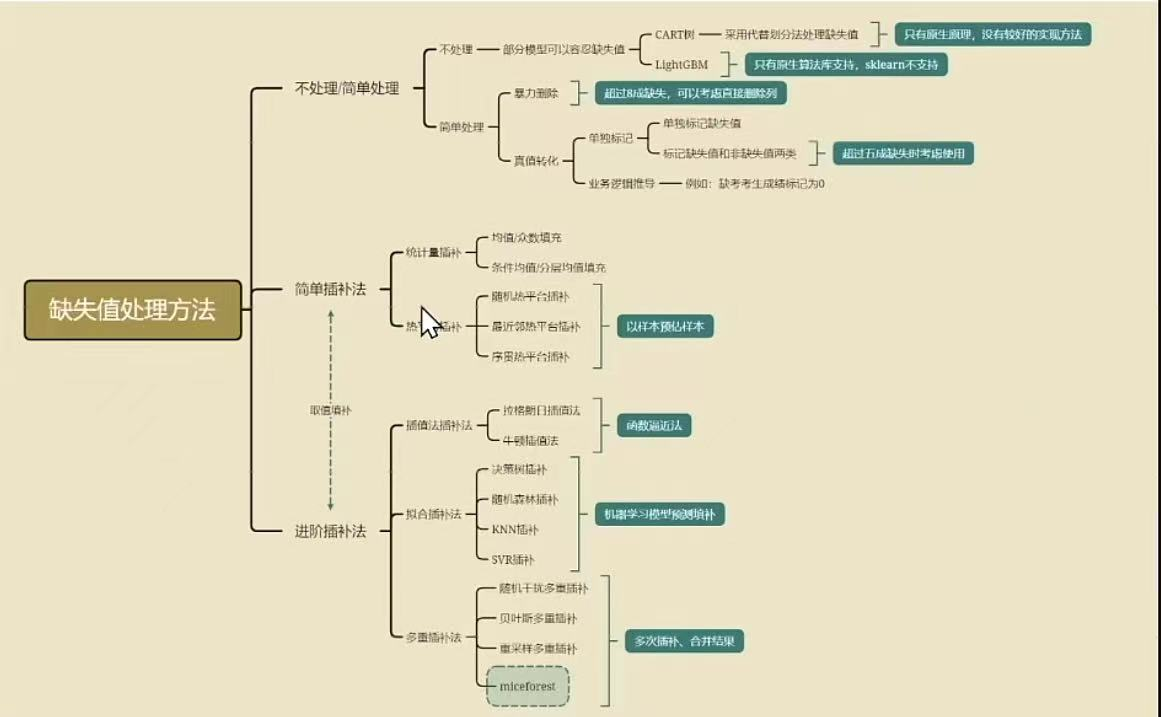